In [ ]:
!pip install spacy

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import spacy
import re

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 13
page_size = 100
reviews_aux =[]
reviews = []
reviewstats_route =[]
df = pd.DataFrame()



# Create a new row


# Append the new row to the DataFrame
#df = df.append(new_row, ignore_index=True)
df.head()
aircraft = 'null'
new_row = {'aircraft': aircraft}
new_row = pd.DataFrame([[aircraft]], columns=['aircraft'])
new_row.head()
#review-rating-stars stars
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for row in parsed_content.find_all("div", {"class": "tc_mobile"}):
      reviews_aux.append(row)
    # Extract aircraft information


#    for row in parsed_content.find_all("tr"):
#            header_route = row.find("td", class_="review-rating-header route")
#            route = row.find("td", class_="review-value")
#            print(header_route)
#            print(route)



           # if route is not None:
             # print(route.get_text().strip())
            #  reviewstats_route.append(route.get_text().strip())
             # print(route.get_text().strip())

            #reviewstats_route.append(route.get_text().strip())
            #if(route is not "null"):
            #    reviewstats_route.append(route.get_text().strip())
    print(len(reviews_aux))
   # print(reviewstats_route)


       #header_seat_comfort = row.find("td", class_="review-rating-header seat_comfort")
       # if header_seat_comfort:
       #     seat_comfort = row.find("td", class_="review-value")
       #     if seat_comfort:
       #         rating_seat_comfort.append(seat_comfort.get_text().strip())
       #     for rating_row in parsed_content.find_all("tr"):
       #         rating_header = rating_row.find("td", class_="review-rating-stars stars")

      #          stars_span = rating_row.find_all("span", class_="star fill")
      #          rating_value = len(stars_span) if stars_span else 0
      #          print(f"{rating_value}")
    # Extract review text
    #df.append(new_row, ignore_index=True)
    for text_content in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(text_content.get_text())

    #print(f"   ---> {len(reviews)} total reviews")

# Now reviewstats_type_traveller should contain the aircraft names
#print(reviewstats_type_traveller)
#print(reviewstats_aircraft)
#print(reviewstats_cabin_flown)
#print(reviewstats_route)
#print(reviewstats_date_flown)

#print(reviews)

Scraping page 1
100
Scraping page 2
200
Scraping page 3
300
Scraping page 4
400
Scraping page 5
500
Scraping page 6
600
Scraping page 7
700
Scraping page 8
800
Scraping page 9
900
Scraping page 10
1000
Scraping page 11
1100
Scraping page 12
1200
Scraping page 13
1300


In [ ]:
reviews_text =[]
for reviews in reviews_aux:
  for row in reviews.find_all("div", {"class": "text_content"}):
          reviews_text.append(row.get_text())
print(len(reviews_text))
print(type(reviews_text))

1300
<class 'list'>


In [ ]:
df2 = pd.DataFrame()

for k in range (0,len(reviews_aux)):
  DICT ={"Type Of Traveller":None,"Seat Type":None,"Route":None,"Date Flown":None}
  df1 = pd.DataFrame({'Type Of Traveller': [None],
                    'cabin_flown': [None],
                    'route': [None],
                    'date_flown': [None],
                    'aircraft':[None]})
  table = reviews_aux[k].find_all("table", {"class": "review-ratings"})
  type_traveler=[]
  cont_2= 0
  last_answer = ""
  tag =False
  for row in table[0].find_all("tr"):
      cont =0
      for tr in row.find_all("td"):
        if(cont%2 ==0):
            last_answer=tr.get_text()
        else:
            DICT[last_answer]=tr.get_text()
        cont =cont+1
      cont_2 = cont_2+1
      if('Value For Money' in DICT.keys()):
        del(DICT['Value For Money'])
      if('Inflight Entertainment' in DICT.keys()):
        del(DICT['Inflight Entertainment'])
      if('Wifi & Connectivity'in DICT.keys() ):
        del(DICT["Wifi & Connectivity"])
      if('Cabin Staff Service'  in DICT.keys()):
        del(DICT["Cabin Staff Service"])
      if("Seat Comfort" in DICT.keys() ):
        del(DICT["Seat Comfort"])
      if("Ground Service" in DICT.keys() ):
        del(DICT["Ground Service"])
      if('Food & Beverages' in DICT.keys() ):
        del(DICT['Food & Beverages'])
  #print(DICT)
  df1 =  pd.DataFrame([DICT])
  df2= pd.concat([df2, df1], axis=0)
print(df2)
              #print(type_traveler[i].get_text())

 #             if((i%4)==0):
 #                 passageiro = type_traveler[i]
                  #print(passageiro)
#                  cabine = None
#                  rota = None
#                  data = None

#              elif((i%4)==1):
#                  cabine =  type_traveler[i]
#                  #print(cabine)
#                  rota = None
#                  data = None
#              elif((i%4)==2):
#                rota = type_traveler[i]
#                #print(rota)
#                data = None
#              elif((i%4)==3):
#                data = type_traveler[i]
                #print(data)


  #df1 =  pd.DataFrame({'type_of_traveller': [passageiro],
  #                          'cabin_flown': [cabine],
  #                          'route': [rota],
  #                          'date_flown':[data],
  #                          'Aircraft':[aircraft]})
  #df2 = pd.concat([df2, df1], axis=0)
  #print(df2)
  #print(df1)



   Type Of Traveller       Seat Type                       Route  \
0     Family Leisure   Economy Class  Dublin  to London Heathrow   
0           Business   Economy Class           Glasgow to London   
0       Solo Leisure   Economy Class         Vancouver to London   
0           Business  Business Class          Heathrow to Madrid   
0     Couple Leisure  Business Class          London to New York   
..               ...             ...                         ...   
0           Business  Business Class    Milan to London Heathrow   
0     Family Leisure  Business Class          London to Helsinki   
0       Solo Leisure   Economy Class   London Heathrow to Denver   
0       Solo Leisure   Economy Class    Heathrow to Kuala Lumpur   
0           Business  Business Class           Bangkok to London   

       Date Flown Recommended         Aircraft  
0    January 2024          no              NaN  
0    January 2024          no              NaN  
0    January 2024         yes       

Ajustar o tipo de avião entrando dentro do type_of_traveller

AGORA COLOCAR PARA TODOS NÓ NÃO PARA O PRIMEIRO
Depois adicionar os reviews

In [ ]:
df2["reviews"] = reviews_text


df2.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,reviews
0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,✅ Trip Verified | The plane was extremely dir...
0,Business,Economy Class,Glasgow to London,January 2024,no,NaN,Not Verified | Overall journey wasn’t bad howe...
0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,✅ Trip Verified | Overall very satisfied. Gro...
0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,✅ Trip Verified | As always when I fly BA it ...
0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,✅ Trip Verified | First time using BA busines...


In [ ]:
type(df2["reviews"])

pandas.core.series.Series

In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
df2.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,reviews
0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,✅ Trip Verified | The plane was extremely dir...
0,Business,Economy Class,Glasgow to London,January 2024,no,NaN,Not Verified | Overall journey wasn’t bad howe...
0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,✅ Trip Verified | Overall very satisfied. Gro...
0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,✅ Trip Verified | As always when I fly BA it ...
0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,✅ Trip Verified | First time using BA busines...


In [ ]:
print(df2.columns)

Index(['Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Recommended',
       'Aircraft', 'reviews'],
      dtype='object')


In [ ]:
for a in df2["reviews"]:
    print(a)
    print("..")

✅ Trip Verified |  The plane was extremely dirty with chocolate smudged all over mine and my children's seats. I had to wipe down all the seats. After we landed I immediately realized I left my camera with it's bag in the airplane overhead cabin. They would not let me back on the plane for security reasons so I went to The British Airways team on ground & they refused to contact cabin crew only until we threw up a massive fuss then the manager reluctantly agreed which by that point cabin crew had disembarked. Now it's been over 3 weeks with no sign of my camera so it is assumed stolen. I have complained to British Airways and all I get is an automated/generic response to keep checking with Lost Property. Zero customer service for their regular customers and this all could have been mitigated if they had been willing to help at the very beginning - very disappointed.
..
Not Verified | Overall journey wasn’t bad however at the end, the baggage arrival nearly took 1.5 hours (more than act

In [ ]:

# Define a regular expression pattern
pattern = r'(?:✅ Verified Review|Not Verified|✅ Trip Verified)\s*\|\s*(.+)'

# Extract the desired part of the text using str.extract
df2['WithoutVerification'] = df2['reviews'].str.extract(pattern)

# Display the resulting DataFrame
print(df2)


   Type Of Traveller       Seat Type                       Route  \
0     Family Leisure   Economy Class  Dublin  to London Heathrow   
0           Business   Economy Class           Glasgow to London   
0       Solo Leisure   Economy Class         Vancouver to London   
0           Business  Business Class          Heathrow to Madrid   
0     Couple Leisure  Business Class          London to New York   
..               ...             ...                         ...   
0           Business  Business Class    Milan to London Heathrow   
0     Family Leisure  Business Class          London to Helsinki   
0       Solo Leisure   Economy Class   London Heathrow to Denver   
0       Solo Leisure   Economy Class    Heathrow to Kuala Lumpur   
0           Business  Business Class           Bangkok to London   

       Date Flown Recommended         Aircraft  \
0    January 2024          no              NaN   
0    January 2024          no              NaN   
0    January 2024         yes    

In [ ]:
df=df2

In [ ]:
df.dropna(subset=['WithoutVerification'], inplace=True)


In [ ]:
len(df)

1300

In [ ]:
print(df.head())

  Type Of Traveller       Seat Type                       Route  \
0    Family Leisure   Economy Class  Dublin  to London Heathrow   
0          Business   Economy Class           Glasgow to London   
0      Solo Leisure   Economy Class         Vancouver to London   
0          Business  Business Class          Heathrow to Madrid   
0    Couple Leisure  Business Class          London to New York   

      Date Flown Recommended         Aircraft  \
0   January 2024          no              NaN   
0   January 2024          no              NaN   
0   January 2024         yes        A350-1000   
0   October 2023          no             A320   
0  November 2023         yes  Boeing 777 -200   

                                             reviews  \
0  ✅ Trip Verified |  The plane was extremely dir...   
0  Not Verified | Overall journey wasn’t bad howe...   
0  ✅ Trip Verified |  Overall very satisfied. Gro...   
0  ✅ Trip Verified |  As always when I fly BA it ...   
0  ✅ Trip Verified |  

In [ ]:
df.columns

Index(['Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Recommended',
       'Aircraft', 'reviews', 'WithoutVerification'],
      dtype='object')

In [ ]:
print(df['Route'].head())

0    Dublin  to London Heathrow
0             Glasgow to London
0           Vancouver to London
0            Heathrow to Madrid
0            London to New York
Name: Route, dtype: object


In [ ]:
import pandas as pd


# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Split the 'Route' column and create a new column 'RouteList'


df['RouteList'] = df['Route'].apply(lambda x: [x[:x.find(' to ')].strip(), x[x.find(' to ')+4:].strip()] if x and ' to ' in x else [])

# Combine splitting into 'Origin' and 'Destination' and creating 'RouteList' into a single line

# Display the result
print(df['RouteList'].head())



Original DataFrame:
   Type Of Traveller       Seat Type                       Route  \
0     Family Leisure   Economy Class  Dublin  to London Heathrow   
0           Business   Economy Class           Glasgow to London   
0       Solo Leisure   Economy Class         Vancouver to London   
0           Business  Business Class          Heathrow to Madrid   
0     Couple Leisure  Business Class          London to New York   
..               ...             ...                         ...   
0           Business  Business Class    Milan to London Heathrow   
0     Family Leisure  Business Class          London to Helsinki   
0       Solo Leisure   Economy Class   London Heathrow to Denver   
0       Solo Leisure   Economy Class    Heathrow to Kuala Lumpur   
0           Business  Business Class           Bangkok to London   

       Date Flown Recommended         Aircraft  \
0    January 2024          no              NaN   
0    January 2024          no              NaN   
0    January 

In [ ]:
for i in df['RouteList']:
    print(i)

['Dublin', 'London Heathrow']
['Glasgow', 'London']
['Vancouver', 'London']
['Heathrow', 'Madrid']
['London', 'New York']
['Rome', 'London']
['Gatwick', 'Geneva']
['Istanbul', 'London Heathrow']
['London Heathrow', 'Istanbul']
['Gatwick', 'St Lucia']
['Sydney', 'London Heathrow']
['Lisbon', 'Houston via London Heathrow']
['Vancouver', 'London Heathrow']
['London Heathrow', 'Stockholm']
['Indianapolis', 'Mumbai via London Heathrow']
['Cyprus', 'New York']
['Gran Canaria', 'London Gatwick']
['Belfast City', 'Atlanta via London Heathrow']
['London', 'Portland']
['London', 'Frankfurt']
['Cape Town', 'London Heathrow']
['Miami', 'Manchester via Heathrow']
['Johannesburg', 'London']
['London Heathrow', 'Singapore']
['Gatwick', 'Las Palmas']
['London Heathrow', 'Geneva']
['Madrid', 'San Francisco via London Heathrow']
['Lisbon', 'London Heathrow']
['Miami', 'London Heathrow']
['Palma de Mallorca', 'Gatwick']
['London', 'Johannesburg']
['Zürich', 'Tokyo Haneda via London']
['London', 'Miami']


In [ ]:
print(df['RouteList'][0][0])

0    [Dublin, London Heathrow]
0            [Glasgow, London]
0          [Vancouver, London]
0           [Heathrow, Madrid]
0           [London, New York]
               ...            
0     [Milan, London Heathrow]
0           [London, Helsinki]
0    [London Heathrow, Denver]
0     [Heathrow, Kuala Lumpur]
0            [Bangkok, London]
Name: RouteList, Length: 1300, dtype: object


In [ ]:
df['RouteList'][0].replace('London Heathrow', 'London', inplace=True)


In [ ]:
list_routes = df['RouteList'].tolist()
print(list_routes)

[['Dublin', 'London Heathrow'], ['Glasgow', 'London'], ['Vancouver', 'London'], ['Heathrow', 'Madrid'], ['London', 'New York'], ['Rome', 'London'], ['Gatwick', 'Geneva'], ['Istanbul', 'London Heathrow'], ['London Heathrow', 'Istanbul'], ['Gatwick', 'St Lucia'], ['Sydney', 'London Heathrow'], ['Lisbon', 'Houston via London Heathrow'], ['Vancouver', 'London Heathrow'], ['London Heathrow', 'Stockholm'], ['Indianapolis', 'Mumbai via London Heathrow'], ['Cyprus', 'New York'], ['Gran Canaria', 'London Gatwick'], ['Belfast City', 'Atlanta via London Heathrow'], ['London', 'Portland'], ['London', 'Frankfurt'], ['Cape Town', 'London Heathrow'], ['Miami', 'Manchester via Heathrow'], ['Johannesburg', 'London'], ['London Heathrow', 'Singapore'], ['Gatwick', 'Las Palmas'], ['London Heathrow', 'Geneva'], ['Madrid', 'San Francisco via London Heathrow'], ['Lisbon', 'London Heathrow'], ['Miami', 'London Heathrow'], ['Palma de Mallorca', 'Gatwick'], ['London', 'Johannesburg'], ['Zürich', 'Tokyo Haneda v

In [ ]:
for i in range(0,len(list_routes)):
  if(len(list_routes[i])==0):
    print(list_routes[i])
    print(i)

[]
55
[]
192
[]
253
[]
384
[]
569
[]
1181


In [ ]:
for i in range(0,len(list_routes)):
  print("...")
  print(list_routes[i])
  for j in range(0,len(list_routes[i])):
    if('via' in list_routes[i][j]):
      #print(list_routes[i])
      place = list_routes[i][j].find('via')
      list_routes[i][j]=list_routes[i][j][0:place]
      print(list_routes[i][j])
  print(list_routes[i])
  print("...")

print(list_routes)

A saída de streaming foi truncada nas últimas 5000 linhas.
['Newark', 'London']
...
...
['London', 'Johannesburg']
['London', 'Johannesburg']
...
...
['LHR', 'LAX']
['LHR', 'LAX']
...
...
['Delhi', 'Vancouver via London']
Vancouver 
['Delhi', 'Vancouver ']
...
...
['Copenhagen', 'London']
['Copenhagen', 'London']
...
...
['Larnaca', 'London Heathrow']
['Larnaca', 'London Heathrow']
...
...
['Washington', 'London']
['Washington', 'London']
...
...
['London', 'Miami']
['London', 'Miami']
...
...
['London', 'Paris']
['London', 'Paris']
...
...
['London', 'Algiers']
['London', 'Algiers']
...
...
['Edinburgh', 'London City']
['Edinburgh', 'London City']
...
...
['London', 'Vienna']
['London', 'Vienna']
...
...
['San Francisco', 'Warsaw via London']
Warsaw 
['San Francisco', 'Warsaw ']
...
...
['Frankfurt', 'London City']
['Frankfurt', 'London City']
...
...
['London', 'Lyon']
['London', 'Lyon']
...
...
['London', 'Hong Kong']
['London', 'Hong Kong']
...
...
['Gatwick', 'Montpelier']
['Gatwi

In [ ]:
list_route_attached = [[] for _ in range(len(list_routes))]  # Correct initialization

print(list_routes)

for i in range(len(list_routes)):
    list_route_attached[i] = list_routes[i][0:2]

print(list_route_attached)

[['Dublin', 'London Heathrow'], ['Glasgow', 'London'], ['Vancouver', 'London'], ['Heathrow', 'Madrid'], ['London', 'New York'], ['Rome', 'London'], ['Gatwick', 'Geneva'], ['Istanbul', 'London Heathrow'], ['London Heathrow', 'Istanbul'], ['Gatwick', 'St Lucia'], ['Sydney', 'London Heathrow'], ['Lisbon', 'Houston '], ['Vancouver', 'London Heathrow'], ['London Heathrow', 'Stockholm'], ['Indianapolis', 'Mumbai '], ['Cyprus', 'New York'], ['Gran Canaria', 'London Gatwick'], ['Belfast City', 'Atlanta '], ['London', 'Portland'], ['London', 'Frankfurt'], ['Cape Town', 'London Heathrow'], ['Miami', 'Manchester '], ['Johannesburg', 'London'], ['London Heathrow', 'Singapore'], ['Gatwick', 'Las Palmas'], ['London Heathrow', 'Geneva'], ['Madrid', 'San Francisco '], ['Lisbon', 'London Heathrow'], ['Miami', 'London Heathrow'], ['Palma de Mallorca', 'Gatwick'], ['London', 'Johannesburg'], ['Zürich', 'Tokyo Haneda '], ['London', 'Miami'], ['London', 'Stuttgart'], ['Brussels', 'London'], ['London Heathr

In [ ]:
print(list_route_attached[2][0])

Vancouver


In [ ]:

df.describe()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,reviews,WithoutVerification,RouteList
count,1298,1300,1297,1300,1300,740,1300,1300,1300
unique,4,4,823,74,2,109,1300,1300,783
top,Couple Leisure,Economy Class,Vancouver to London,May 2018,no,A320,✅ Trip Verified | The plane was extremely dir...,The plane was extremely dirty with chocolate s...,"[London, Johannesburg]"
freq,433,722,11,38,864,161,1,1,13


In [ ]:
print(len(list_route_attached))

1300


In [ ]:
for i in range(0,len(list_route_attached)):
  if(len(list_route_attached[i])!=2):
    print(list_route_attached[i])
    print(i)

[]
55
[]
192
[]
253
[]
384
[]
569
[]
1181


In [ ]:
origin=[]
destination=[]
print(list_route_attached)
for i in range(0,1300):
  origin.append(None)
  destination.append(None)
exclude_values = [55, 192, 253, 384, 569, 1181]
cont =0
for i in range(0,len(list_route_attached)):
  #print(cont)
  #print(row)
  if list_route_attached[i] and len(list_route_attached[i]) > 0 and (cont-1) not in exclude_values:
    #print(row[0])
    origin[cont] = list_route_attached[i][0]
    destination[cont]=list_route_attached[i][1]
  else:
    origin[cont] = None
    destination[cont] = None
  cont =cont+1
print(origin)
print(destination)

[['Dublin', 'London Heathrow'], ['Glasgow', 'London'], ['Vancouver', 'London'], ['Heathrow', 'Madrid'], ['London', 'New York'], ['Rome', 'London'], ['Gatwick', 'Geneva'], ['Istanbul', 'London Heathrow'], ['London Heathrow', 'Istanbul'], ['Gatwick', 'St Lucia'], ['Sydney', 'London Heathrow'], ['Lisbon', 'Houston '], ['Vancouver', 'London Heathrow'], ['London Heathrow', 'Stockholm'], ['Indianapolis', 'Mumbai '], ['Cyprus', 'New York'], ['Gran Canaria', 'London Gatwick'], ['Belfast City', 'Atlanta '], ['London', 'Portland'], ['London', 'Frankfurt'], ['Cape Town', 'London Heathrow'], ['Miami', 'Manchester '], ['Johannesburg', 'London'], ['London Heathrow', 'Singapore'], ['Gatwick', 'Las Palmas'], ['London Heathrow', 'Geneva'], ['Madrid', 'San Francisco '], ['Lisbon', 'London Heathrow'], ['Miami', 'London Heathrow'], ['Palma de Mallorca', 'Gatwick'], ['London', 'Johannesburg'], ['Zürich', 'Tokyo Haneda '], ['London', 'Miami'], ['London', 'Stuttgart'], ['Brussels', 'London'], ['London Heathr

In [ ]:
len(origin)

1300

In [ ]:
df['Origin'] = origin

In [ ]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,reviews,WithoutVerification,RouteList,Origin
0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,✅ Trip Verified | The plane was extremely dir...,The plane was extremely dirty with chocolate s...,"[Dublin, London Heathrow]",Dublin
0,Business,Economy Class,Glasgow to London,January 2024,no,NaN,Not Verified | Overall journey wasn’t bad howe...,"Overall journey wasn’t bad however at the end,...","[Glasgow, London]",Glasgow
0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,✅ Trip Verified | Overall very satisfied. Gro...,Overall very satisfied. Ground staff member at...,"[Vancouver, London]",Vancouver
0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,✅ Trip Verified | As always when I fly BA it ...,As always when I fly BA it was a total shamble...,"[Heathrow, Madrid]",Heathrow
0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,✅ Trip Verified | First time using BA busines...,First time using BA business class but we were...,"[London, New York]",London


In [ ]:
df['Destination'] = destination

In [ ]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,reviews,WithoutVerification,RouteList,Origin,Destination
0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,✅ Trip Verified | The plane was extremely dir...,The plane was extremely dirty with chocolate s...,"[Dublin, London Heathrow]",Dublin,London Heathrow
0,Business,Economy Class,Glasgow to London,January 2024,no,NaN,Not Verified | Overall journey wasn’t bad howe...,"Overall journey wasn’t bad however at the end,...","[Glasgow, London]",Glasgow,London
0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,✅ Trip Verified | Overall very satisfied. Gro...,Overall very satisfied. Ground staff member at...,"[Vancouver, London]",Vancouver,London
0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,✅ Trip Verified | As always when I fly BA it ...,As always when I fly BA it was a total shamble...,"[Heathrow, Madrid]",Heathrow,Madrid
0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,✅ Trip Verified | First time using BA busines...,First time using BA business class but we were...,"[London, New York]",London,New York


In [ ]:
df = df.drop('RouteList', axis=1)
df = df.drop('reviews', axis=1)


In [ ]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,WithoutVerification,Origin,Destination
0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,The plane was extremely dirty with chocolate s...,Dublin,London Heathrow
0,Business,Economy Class,Glasgow to London,January 2024,no,NaN,"Overall journey wasn’t bad however at the end,...",Glasgow,London
0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,Overall very satisfied. Ground staff member at...,Vancouver,London
0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,As always when I fly BA it was a total shamble...,Heathrow,Madrid
0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,First time using BA business class but we were...,London,New York


In [ ]:
!pip install textblob

In [ ]:


# Assuming df is your DataFrame with a 'WithoutVerification' column
# Replace df['WithoutVerification'] with your actual column name if needed

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Process each review and extract named entities
time_list = []
matches =[]
for review in df['WithoutVerification']:
    print(len(time_list))
    doc = nlp(review)
    time_in_review = [ent.text for ent in doc.ents if ent.label_ == "TIME"]
    #print(time_in_review)
    if(time_in_review):
      pattern = re.compile(r'(\d+(?:\.\d+)?)\s*(hours|hour|minutes|minute)')
      for i in time_in_review:
        matches = pattern.findall(i)
        #print(matches)
    time_list.append(matches)
    #print(time_list)
  #  else:
   #   time_list.append(time_in_review)

# Assign the list of cities to the 'Cities' column in the DataFrame
#df['Cities'] = cities_list

# Print the DataFrame to see the changes
print(time_list)
print(len(time_list))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print(len(time_list))

1300


In [ ]:
df['Time'] = time_list


In [ ]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,WithoutVerification,Origin,Destination,Time
0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,The plane was extremely dirty with chocolate s...,Dublin,London Heathrow,[]
0,Business,Economy Class,Glasgow to London,January 2024,no,NaN,"Overall journey wasn’t bad however at the end,...",Glasgow,London,"[(1.5, hours)]"
0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,Overall very satisfied. Ground staff member at...,Vancouver,London,"[(1.5, hours)]"
0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,As always when I fly BA it was a total shamble...,Heathrow,Madrid,"[(3, hours)]"
0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,First time using BA business class but we were...,London,New York,"[(2, minutes)]"


Até aqui okk

In [ ]:
!pip install wordcloud

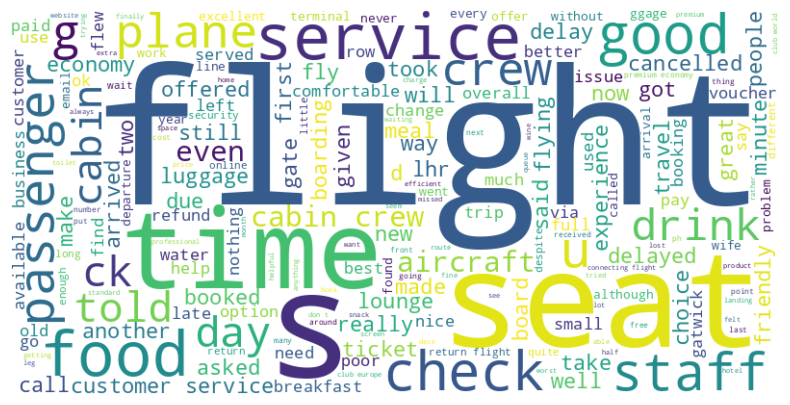

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'WithoutVerification' column
# Replace df['WithoutVerification'] with your actual column name if needed

exclude_words = ['BA', 'London', 'British Airway', 'one', 'airport', 'airline','Heathrow','hour','ba','british airway','london','heathrow','business class']  # Add the words you want to exclude to this list

# Concatenate all text in the 'WithoutVerification' column
text = ' '.join(df['WithoutVerification'].astype(str))
text = text.lower()
# Remove the excluded words
for word in exclude_words:
    text = text.replace(word, '')

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
important_words = ['flight','service','time','crew member','cabin crew','staff','boarding','bag','meals','seat','maintenance','customer service','cancelled','rebook','refund','check in','checkin','drink','plane']

In [ ]:
wrds_review=[]
wrds_apperance=[]
for i in range (0,len(important_words)):
    wrds_apperance.append(0)
cont=0
for review in df['WithoutVerification']:
    review_list=[]
    for i in range(0,len(important_words)):
        if important_words[i] in review:
           review_list.append(important_words[i])
           if important_words[i] in review:
                wrds_apperance[i] = wrds_apperance[i]+1
           else:
                wrds_apperance.append(i)
                wrds_apperance.append(1)
    wrds_review.append(review_list)
print(wrds_review)
df['Important topics'] = wrds_review
print(wrds_apperance)

[['service', 'cabin crew', 'bag', 'seat', 'customer service', 'checkin', 'plane'], ['flight', 'time', 'staff', 'bag'], ['flight', 'service', 'time', 'staff', 'seat', 'plane'], ['flight', 'boarding'], ['service', 'time', 'cabin crew', 'bag', 'seat', 'check in', 'drink'], ['flight', 'service', 'bag', 'plane'], ['flight', 'service', 'time', 'boarding', 'bag', 'cancelled', 'plane'], ['flight', 'service', 'cabin crew', 'seat', 'drink'], ['flight', 'service', 'time', 'seat', 'maintenance'], ['cabin crew', 'seat'], ['flight', 'service', 'time', 'crew member', 'meals', 'seat'], ['flight', 'service', 'time', 'seat', 'drink'], ['flight', 'service', 'time', 'seat', 'maintenance'], ['flight', 'staff', 'meals', 'seat', 'drink'], ['flight', 'service', 'time', 'customer service', 'rebook'], ['flight', 'refund'], ['flight', 'service', 'time', 'cabin crew', 'staff', 'boarding', 'meals', 'seat', 'check in', 'drink'], ['flight', 'service'], ['flight', 'service', 'boarding', 'seat', 'drink'], ['flight', '

In [ ]:
print(df.head())

  Type Of Traveller       Seat Type                       Route  \
0    Family Leisure   Economy Class  Dublin  to London Heathrow   
0          Business   Economy Class           Glasgow to London   
0      Solo Leisure   Economy Class         Vancouver to London   
0          Business  Business Class          Heathrow to Madrid   
0    Couple Leisure  Business Class          London to New York   

      Date Flown Recommended         Aircraft  \
0   January 2024          no              NaN   
0   January 2024          no              NaN   
0   January 2024         yes        A350-1000   
0   October 2023          no             A320   
0  November 2023         yes  Boeing 777 -200   

                                 WithoutVerification     Origin  \
0  The plane was extremely dirty with chocolate s...     Dublin   
0  Overall journey wasn’t bad however at the end,...    Glasgow   
0  Overall very satisfied. Ground staff member at...  Vancouver   
0  As always when I fly BA it was 

pegar amostra de 20 reviews e ver o que eles falam a partir disso dividir em categorias
ex.: atraso, cancelamento, serviço de bordo, sala vip, etc

.Negative Words.  Worse, broken,poor, pathetic,disappointing,chaotic, terrible
.Positive words. fantastic, Good,efficient, great, verry nice,

topic words:
flight
service
time
crew member, cabin crew
staff
boarding
meals
seat
business class
maintenance
customer service
cancelled
rebook
refund
check in or checkin
..


Até aqui ok
o que falta: converter o texto de minutos e horas em valores reais
analisar os dados

In [ ]:
df['Time'].head()

0                []
0    [(1.5, hours)]
0    [(1.5, hours)]
0      [(3, hours)]
0    [(2, minutes)]
Name: Time, dtype: object

In [ ]:
import re

def convert_to_minutes(time_str):
    # Expressão regular para encontrar números e unidades de tempo
    total_minutes=0
    pattern = re.compile(r'(\d+(?:\.\d+)?)\s*(hours|hour|minutes|minute)')
    #print(time_str)
    if(time_str):
    # Encontrar todas as correspondências na string
          #print(time_str)
          unit = time_str[1].lower()
          value = time_str[0]
          if unit == 'hour' or unit == 'hours':
              total_minutes += float(value) * 60
          elif unit == 'minute' or unit == 'minutes' :
              total_minutes +=float(value)
          return total_minutes
    else:
      return None

# Exemplo de uso
#data = [(3, 'hours'), (2, 'minutes')]
converted_data = []
for item in df['Time']:
  if(len(item)>0):
    #print(convert_to_minutes(item[0]) )
    converted_data.append(convert_to_minutes(item[0]) )
  else:
    converted_data.append(None)
print(converted_data)
print(len(converted_data))


[None, 90.0, 90.0, 180.0, 2.0, 2.0, None, 240.0, None, None, 1440.0, 1440.0, 10.0, 10.0, 240.0, 240.0, 240.0, None, None, None, None, 240.0, 660.0, 660.0, 660.0, 660.0, 90.0, 90.0, 360.0, 60.0, None, None, 60.0, None, 120.0, None, 180.0, 4320.0, None, None, None, 1440.0, None, None, 15.0, None, None, None, None, None, None, None, None, None, None, None, None, None, 240.0, 240.0, 240.0, 240.0, None, 90.0, 720.0, 720.0, 720.0, 120.0, 120.0, 120.0, None, 90.0, 90.0, 40.0, 40.0, 40.0, 840.0, 20.0, 240.0, 240.0, 480.0, None, 1200.0, 1200.0, None, None, 1440.0, 1440.0, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1440.0, None, None, None, None, None, None, None, None, None, None, None, 720.0, 720.0, None, None, None, None, None, 720.0, None, None, None, None, None, None, 120.0, 120.0, 1560.0, 300.0, None, None, None, None, 180.0, None, None, None, None, None, 25.0, 300.0, 300.0, 300.0, 300.0, 60.0, 60.0, 60.0, 60.0, None, 210.0, 

In [ ]:
df['Time']=converted_data

In [ ]:
df['Time'].head()

0      NaN
0     90.0
0     90.0
0    180.0
0      2.0
Name: Time, dtype: float64

In [ ]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,WithoutVerification,Origin,Destination,Time,Important topics
0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,The plane was extremely dirty with chocolate s...,Dublin,London Heathrow,NaN,"[service, cabin crew, bag, seat, customer serv..."
0,Business,Economy Class,Glasgow to London,January 2024,no,NaN,"Overall journey wasn’t bad however at the end,...",Glasgow,London,90.0,"[flight, time, staff, bag]"
0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,Overall very satisfied. Ground staff member at...,Vancouver,London,90.0,"[flight, service, time, staff, seat, plane]"
0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,As always when I fly BA it was a total shamble...,Heathrow,Madrid,180.0,"[flight, boarding]"
0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,First time using BA business class but we were...,London,New York,2.0,"[service, time, cabin crew, bag, seat, check i..."


In [ ]:
df=df.drop('Route', axis=1)

In [ ]:
df.head()

,Type Of Traveller,Seat Type,Date Flown,Recommended,Aircraft,WithoutVerification,Origin,Destination,Time,Important topics
0,Family Leisure,Economy Class,January 2024,no,NaN,The plane was extremely dirty with chocolate s...,Dublin,London Heathrow,NaN,"[service, cabin crew, bag, seat, customer serv..."
0,Business,Economy Class,January 2024,no,NaN,"Overall journey wasn’t bad however at the end,...",Glasgow,London,90.0,"[flight, time, staff, bag]"
0,Solo Leisure,Economy Class,January 2024,yes,A350-1000,Overall very satisfied. Ground staff member at...,Vancouver,London,90.0,"[flight, service, time, staff, seat, plane]"
0,Business,Business Class,October 2023,no,A320,As always when I fly BA it was a total shamble...,Heathrow,Madrid,180.0,"[flight, boarding]"
0,Couple Leisure,Business Class,November 2023,yes,Boeing 777 -200,First time using BA business class but we were...,London,New York,2.0,"[service, time, cabin crew, bag, seat, check i..."


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y').dt.to_period('M')


In [ ]:
df['Date Flown'].head()

0    2024-01
0    2024-01
0    2024-01
0    2023-10
0    2023-11
Name: Date Flown, dtype: period[M]

In [ ]:
counts_Date = df['Date Flown'].value_counts()
print(type(counts_Date[0]))

<class 'numpy.int64'>


In [ ]:
print(counts_Date)

2018-05    38
2019-10    36
2019-07    34
2023-03    33
2019-05    33
           ..
2020-11     2
2017-08     2
2017-12     2
2020-06     1
2018-01     1
Freq: M, Name: Date Flown, Length: 74, dtype: int64


In [ ]:
counts_Date = counts_Date.sort_index()
print(counts_Date)

2017-08     2
2017-12     2
2018-01     1
2018-02     6
2018-03    26
           ..
2023-09    23
2023-10    23
2023-11    16
2023-12    18
2024-01     4
Freq: M, Name: Date Flown, Length: 74, dtype: int64


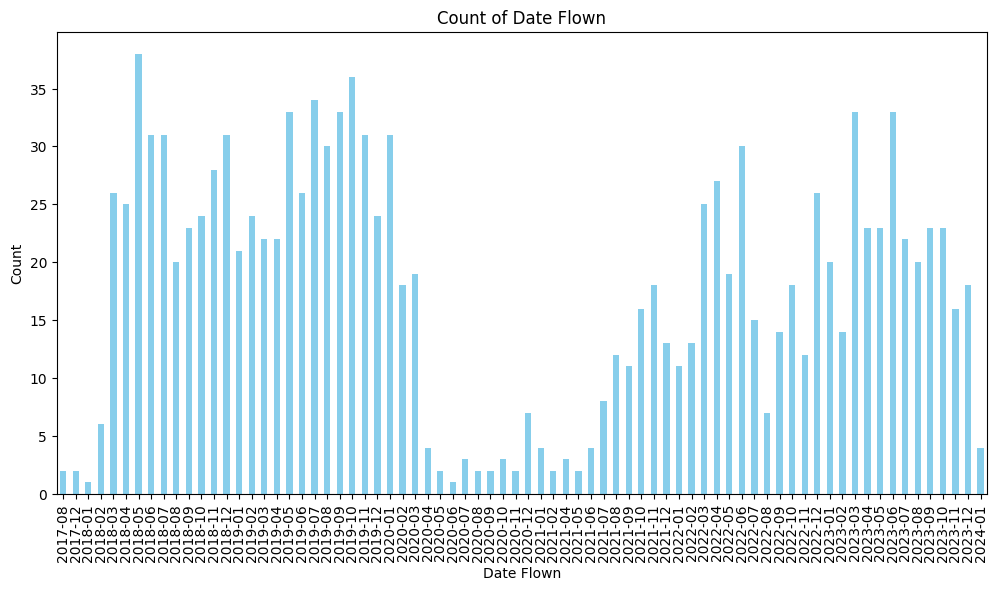

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
counts_Date.plot(kind='bar', color='skyblue')
plt.title('Count of Date Flown')
plt.xlabel('Date Flown')
plt.ylabel('Count')
plt.show()

In [ ]:
counts_TypeTraveller = df['Type Of Traveller'].value_counts()
print(counts_TypeTraveller)

Couple Leisure    433
Solo Leisure      411
Business          256
Family Leisure    198
Name: Type Of Traveller, dtype: int64


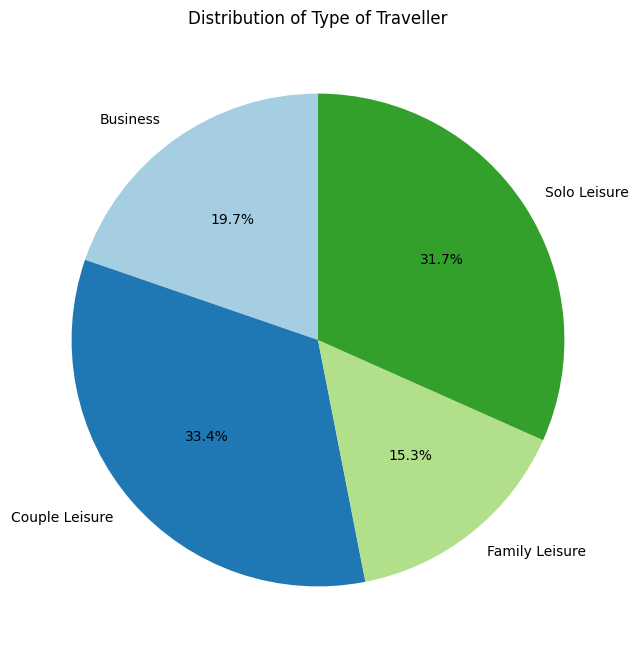

In [ ]:

# Sort the data chronologically by the index (date)
counts_TypeTraveller = counts_TypeTraveller.sort_index()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(counts_TypeTraveller, labels=counts_TypeTraveller.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Type of Traveller')
plt.show()


In [ ]:
counts_SeatType = df['Seat Type'].value_counts()
print(counts_SeatType)

Economy Class      722
Business Class     420
Premium Economy    113
First Class         45
Name: Seat Type, dtype: int64


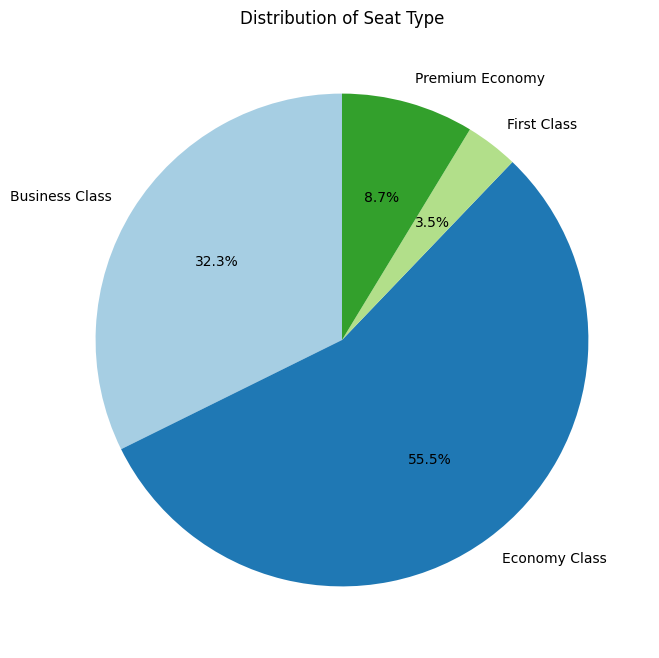

In [ ]:
# Sort the data chronologically by the index (date)
counts_SeatType = counts_SeatType.sort_index()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(counts_SeatType, labels=counts_SeatType.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Seat Type')
plt.show()


In [ ]:
counts_Recommended = df['Recommended'].value_counts()

print(counts_Recommended)

no     864
yes    436
Name: Recommended, dtype: int64


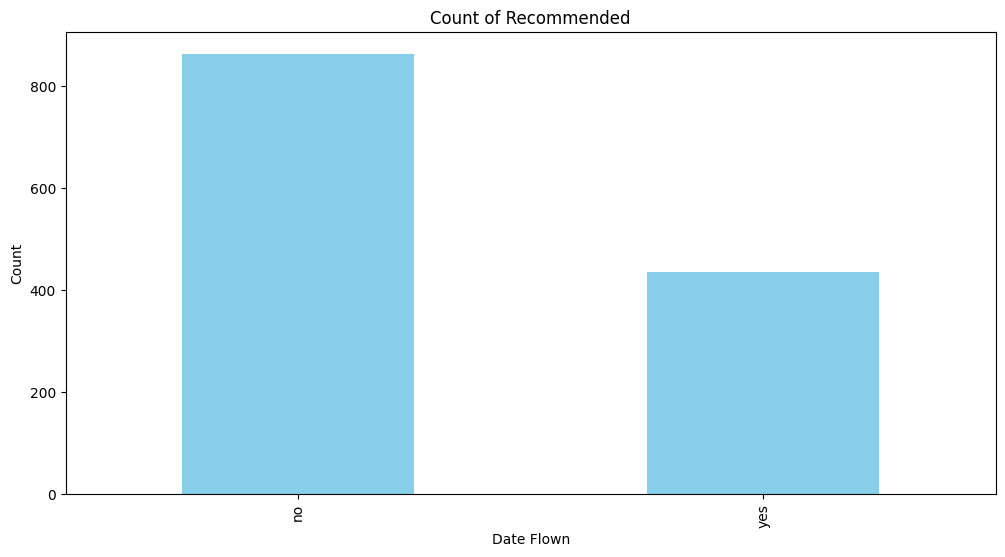

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
counts_Recommended.plot(kind='bar', color='skyblue')
plt.title('Count of Recommended')
plt.xlabel('Date Flown')
plt.ylabel('Count')
plt.show()

[]
5006
[('flight', 1034), ('service', 611), ('seat', 582), ('time', 550), ('staff', 336)]
[('flight', 1034), ('service', 611), ('seat', 582), ('time', 550), ('staff', 336), ('others', 1893)]


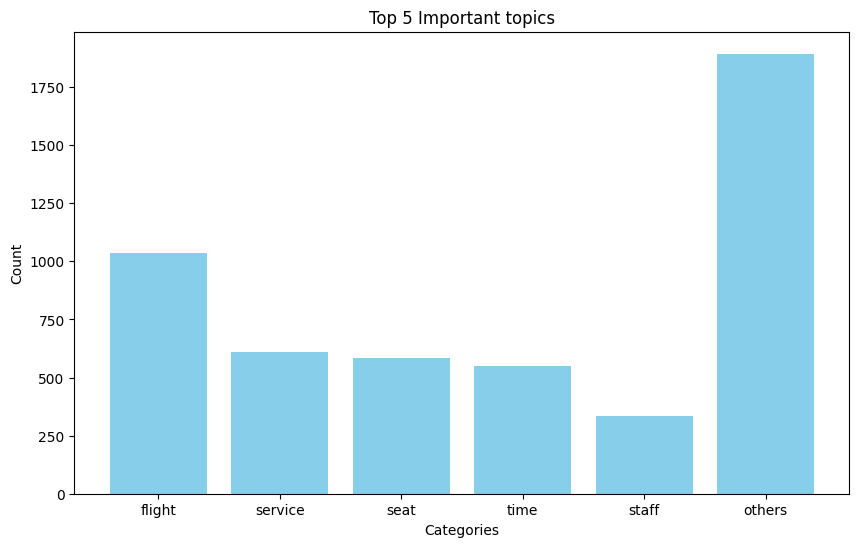

In [ ]:
# Sort the data chronologically by the index (date)
from collections import Counter

counts_Important_topics=[]
print(counts_Important_topics)
for i in df['Important topics']:
  for j in i:
    counts_Important_topics.append(j)
print(len(counts_Important_topics))

cont =0
element_counts = {}
for item in counts_Important_topics:
    element_counts[item] = element_counts.get(item, 0) + 1

# Get the 5 elements with the greatest values
top_5_elements = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)[:5]

result_list = list(top_5_elements)
print(result_list)


for i in range(0,5):
  cont=cont+top_5_elements[i][1]

result_list.append(('others',len(counts_Important_topics)-cont))
print(result_list)

labels, values = zip(*result_list)

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Top 5 Important topics')
plt.show()

O que eu gostaria de mostrar(estatisticas)
*   Densidade demográfica dos dados levantados(type of traveller, seat type, origin),
*   Classificação do important topics
* estatisticas de cada tipo de passageiro com recomendações
* principais tópicos de reclamação e elogios(juntar recommended e Important topics)


